In [1]:
### dependecies ###
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import data_preparation as dp
import os

In [2]:
# 1. how good is it for all videos at all time? 
# 2. how good is it for all videos in the last 10 seconds ?
# 3. jedes Video pro Person => total viele
# 4. alle Personen pro Video: 15 kleine Plots, wird es zum Ende hin schlechter?
# alle Versuchspersonen in allgemeinen Plot

## Frage: welche Daten verlieren wir?

c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:24: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


<AxesSubplot: xlabel='Stimulus'>

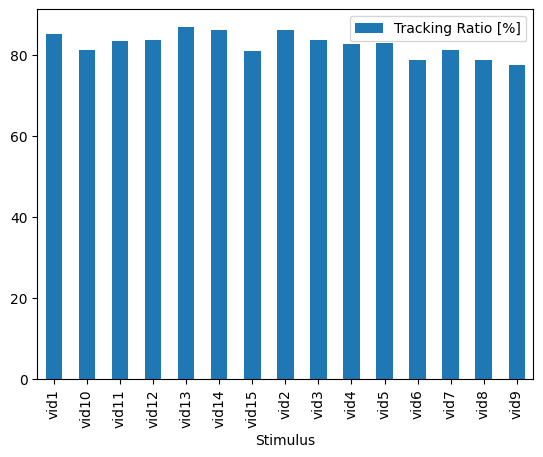

In [2]:
df = dp.read_data("Event Statistics - Single - 01.txt")
df_use = dp.drop_unused_columns(df)
df_left_eye =  dp.df_prepare_eye_tracking_data(df_use)[0] #df_right_eye = dp.df_prepare_eye_tracking_data(df_use)[1]
df_10sek_left = dp.cut_last_10sec_of_videos(df_left_eye)

final = pd.DataFrame()
df_10sek_left.loc[:, ["Stimulus","Tracking Ratio [%]"]].groupby("Stimulus").mean().plot(kind = "bar")#["Tracking Ratio [%]"].plot()

In [5]:
df_10sek_left

,Trial,Stimulus,Export End Trial Time [ms],Participant,Tracking Ratio [%],Category,Eye L/R,Event Start Trial Time [ms],Event End Trial Time [ms],Event Duration [ms],...,Saccade End Position X [px],Saccade End Position Y [px],Saccade Amplitude [°],Saccade Acceleration Average [°/s²],Saccade Acceleration Peak [°/s²],Saccade Deceleration Peak [°/s²],Saccade Velocity Average [°/s],Saccade Velocity Peak [°/s],Saccade Peak Velocity at [%],Fixation Average Pupil Diameter [mm] subtractive baseline correction
13828,Trial043,vid1,201054.568,1,85.268,Fixation,Left,191094.106,191382.270,288.164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.964568
13830,Trial043,vid1,201054.568,1,85.268,Saccade,Left,191382.270,191458.276,76.006,...,906.048,448.250,5.882,5555.549,14023.363,-13743.575,77.384,309.417,26.318,NaN
13832,Trial043,vid1,201054.568,1,85.268,Fixation,Left,191458.276,191530.252,71.976,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.068568
13833,Trial043,vid1,201054.568,1,85.268,Blink,Left,191530.252,191830.166,299.914,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13835,Trial043,vid1,201054.568,1,85.268,Fixation,Left,191830.166,192002.234,172.068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.039568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44353,Trial085,vid15,214521.271,1,80.971,Fixation,Left,213076.329,213196.405,120.076,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.273568
44355,Trial085,vid15,214521.271,1,80.971,Blink,Left,213208.408,213432.295,223.887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44356,Trial085,vid15,214521.271,1,80.971,Fixation,Left,213432.295,213568.221,135.926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.252568
44359,Trial085,vid15,214521.271,1,80.971,Saccade,Left,213568.221,213596.221,28.000,...,1627.381,231.419,1.453,3397.408,4820.085,-4581.908,51.905,104.185,42.857,NaN


array(['vid1', 'vid2', 'vid3', 'vid4', 'vid5', 'vid6', 'vid7', 'vid8',
       'vid9', 'vid10', 'vid11', 'vid12', 'vid13', 'vid14', 'vid15'],
      dtype=object)

In [4]:
os.chdir("C:/Users/Julia/Desktop/Daten-BA/SMI_Eventstatistics") 
#get all files in directory
list = os.listdir() 
# remove participants
list.remove("Event Statistics - Single - 82.txt")
df_tracking_ratio_left_eye_all_participants = pd.DataFrame()
df_tracking_ratio_right_eye_all_participants = pd.DataFrame()
for filename in list:
    print(filename)
    # input: filename # output: dataframe to work on
    df = dp.read_data(filename)
    df_use =dp.drop_unused_columns(df)
    
    # input: df_10_sec_of_videos # output: (df_left_eye, df_right_eye)
    df_left_eye =  dp.df_prepare_eye_tracking_data(df_use)[0] 
    df_right_eye = dp.df_prepare_eye_tracking_data(df_use)[1]
    
    # input: data_initial # output: necessary videomoments
    df_10_sec_of_videos_left = dp.cut_last_10sec_of_videos(df_left_eye) 
    df_10_sec_of_videos_right = dp.cut_last_10sec_of_videos(df_right_eye)
    
    df_tracking_ratio_one_participant = df_10_sec_of_videos_left.loc[:, ["Stimulus","Tracking Ratio [%]"]]
    df_tracking_ratio_one_participant_right = df_10_sec_of_videos_right.loc[:, ["Stimulus","Tracking Ratio [%]"]]

    
    df_tracking_ratio_left_eye_all_participants = pd.concat([df_tracking_ratio_left_eye_all_participants, df_tracking_ratio_one_participant])
    df_tracking_ratio_right_eye_all_participants = pd.concat([df_tracking_ratio_right_eye_all_participants, df_tracking_ratio_one_participant_right])

df_tracking_ratio_left_eye_all_participants
df_tracking_ratio_right_eye_all_participants

Event Statistics - Single - 01.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 02.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 03.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 04.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 05.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 06.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 07.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 08.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 09.txt
Event Statistics - Single - 10.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 11.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 12.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 13.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 14.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 15.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 16.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 17.txt
Event Statistics - Single - 18.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 19.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 20.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 21.txt
Event Statistics - Single - 22.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 23.txt
Event Statistics - Single - 24.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 25.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 26.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 27.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 28.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 29.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 30.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 31.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 32.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 33.txt
Event Statistics - Single - 34.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 35.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 36.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 37.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 38.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 39.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 40.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 41.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 42.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 43.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 44.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 45.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 46.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 47.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 48.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 49.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 50.txt
Event Statistics - Single - 51.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 52.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 53.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 54.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 55.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 56.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 57.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 58.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 59.txt
Event Statistics - Single - 60.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 61.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 62.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 63.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 64.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 65.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 66.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 67.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 68.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 69.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 70.txt
Event Statistics - Single - 71.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 72.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 73.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 74.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 75.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 76.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 77.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 78.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 79.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 80.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 81.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 822.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 83.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 84.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 85.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 86.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 87.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 88.txt
Event Statistics - Single - 89_2.txt
Event Statistics - Single - 90.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 91.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 92.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 93.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 94.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 95.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


Event Statistics - Single - 97.txt


c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


,Stimulus,Tracking Ratio [%]
13827,vid1,85.268
13829,vid1,85.268
13831,vid1,85.268
13834,vid1,85.268
13836,vid1,85.268
...,...,...
36296,vid15,80.356
36298,vid15,80.356
36300,vid15,80.356
36302,vid15,80.356


,Tracking Ratio [%]
Stimulus,
vid1,87.504001
vid2,83.575060
vid3,81.758494
vid4,80.782489
vid5,76.733225
vid6,79.390561
vid7,78.708883
vid8,79.145755
vid9,76.314982


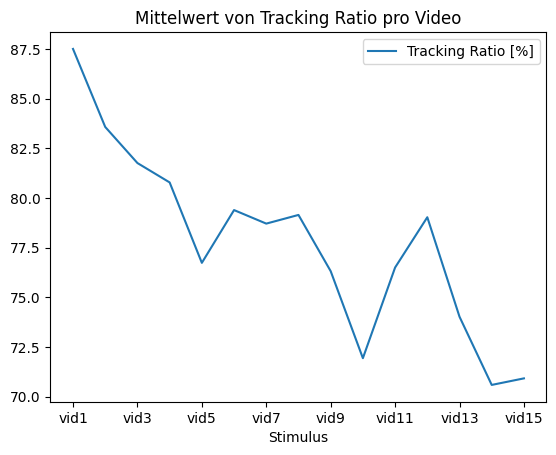

In [5]:
## Mittelwert von Tracking ratio über alle Videos in den letzten 10 sekunden eines Videos mit Threshold
df_tracking_ratio_left_eye_all_participants.groupby("Stimulus").mean().reindex(["vid1","vid2","vid3","vid4","vid5","vid6"
,"vid7","vid8","vid9", "vid10","vid11","vid12","vid13","vid14","vid15"]).plot(title= "Mittelwert von Tracking Ratio pro Video")


df_tracking_ratio_left_eye_all_participants.groupby("Stimulus").mean().reindex(["vid1","vid2","vid3","vid4","vid5","vid6"
,"vid7","vid8","vid9", "vid10","vid11","vid12","vid13","vid14","vid15"])



,Tracking Ratio [%]
Stimulus,
vid1,88.369235
vid2,82.662221
vid3,82.071240
vid4,82.459488
vid5,77.779963
vid6,79.501768
vid7,78.638120
vid8,79.208492
vid9,75.463402


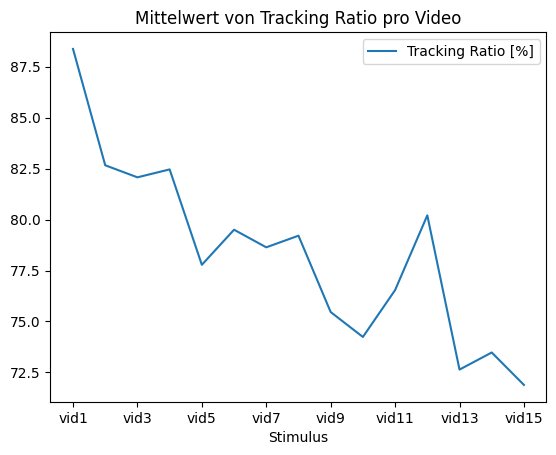

In [6]:
df_tracking_ratio_right_eye_all_participants
df_tracking_ratio_right_eye_all_participants.groupby("Stimulus").mean().reindex(["vid1","vid2","vid3","vid4","vid5","vid6"
,"vid7","vid8","vid9", "vid10","vid11","vid12","vid13","vid14","vid15"]).plot(title= "Mittelwert von Tracking Ratio pro Video")


df_tracking_ratio_right_eye_all_participants.groupby("Stimulus").mean().reindex(["vid1","vid2","vid3","vid4","vid5","vid6"
,"vid7","vid8","vid9", "vid10","vid11","vid12","vid13","vid14","vid15"])


In [ ]:
#Tracking ratio of all data 
os.chdir("C:/Users/Julia/Desktop/Daten-BA/SMI_Eventstatistics") 
#get all files in directory
list = os.listdir() 
# remove participants
list.remove("Event Statistics - Single - 82.txt")
df_tracking_ratio_left_eye_all_participants = pd.DataFrame()
df_tracking_ratio_right_eye_all_participants = pd.DataFrame()
for filename in list:
    print(filename)
    # input: filename # output: dataframe to work on
    df = dp.read_data(filename)
    df_use =dp.drop_unused_columns(df)
    
    
    df_tracking_ratio_one_participant_left = df_use.loc[df_use["Eye L/R"] == "Left", ["Stimulus","Tracking Ratio [%]"]]
    df_tracking_ratio_one_participant_right = df_use.loc[df_use["Eye L/R"] == "Right", ["Stimulus","Tracking Ratio [%]"]]

    
    df_tracking_ratio_left_eye_all_participants = pd.concat([df_tracking_ratio_left_eye_all_participants, df_tracking_ratio_one_participant_left])
    df_tracking_ratio_right_eye_all_participants = pd.concat([df_tracking_ratio_right_eye_all_participants, df_tracking_ratio_one_participant_right])

df_tracking_ratio_left_eye_all_participants

,Tracking Ratio [%]
Stimulus,
vid1,87.661330
vid2,84.451502
vid3,83.249085
vid4,80.764143
vid5,78.478322
vid6,80.939450
vid7,77.687210
vid8,78.297237
vid9,76.783431


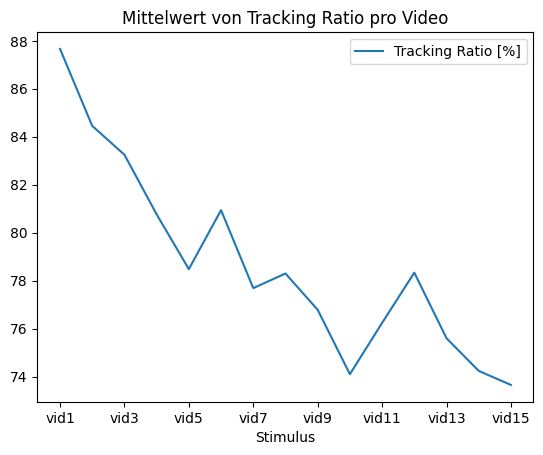

In [8]:
df_tracking_ratio_right_eye_all_participants
df_tracking_ratio_right_eye_all_participants.groupby("Stimulus").mean().reindex(["vid1","vid2","vid3","vid4","vid5","vid6"
,"vid7","vid8","vid9", "vid10","vid11","vid12","vid13","vid14","vid15"]).plot(title= "Mittelwert von Tracking Ratio pro Video")


df_tracking_ratio_right_eye_all_participants.groupby("Stimulus").mean().reindex(["vid1","vid2","vid3","vid4","vid5","vid6"
,"vid7","vid8","vid9", "vid10","vid11","vid12","vid13","vid14","vid15"])


,Tracking Ratio [%]
Stimulus,
vid1,87.375729
vid2,84.653184
vid3,82.430808
vid4,80.564941
vid5,78.073024
vid6,80.595326
vid7,77.852665
vid8,78.368237
vid9,76.387974


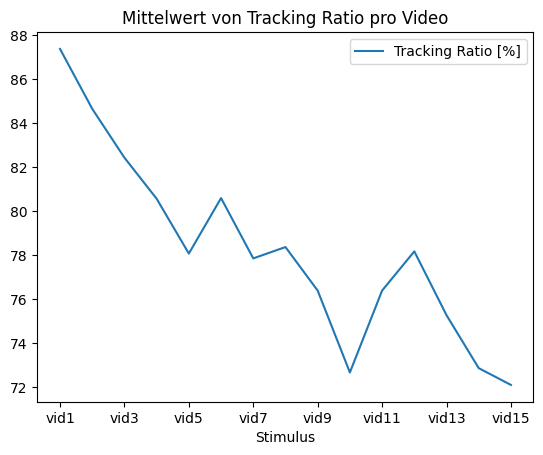

In [9]:
df_tracking_ratio_left_eye_all_participants
df_tracking_ratio_left_eye_all_participants.groupby("Stimulus").mean().reindex(["vid1","vid2","vid3","vid4","vid5","vid6"
,"vid7","vid8","vid9", "vid10","vid11","vid12","vid13","vid14","vid15"]).plot(title= "Mittelwert von Tracking Ratio pro Video")


df_tracking_ratio_left_eye_all_participants.groupby("Stimulus").mean().reindex(["vid1","vid2","vid3","vid4","vid5","vid6"
,"vid7","vid8","vid9", "vid10","vid11","vid12","vid13","vid14","vid15"])

In [10]:
# alle VP und dann tracking ratio of Videos 
# ausschluss von VP durch anschauen von vp

In [ ]:
# last 10 seconds

os.chdir("C:/Users/Julia/Desktop/Daten-BA/SMI_Eventstatistics") 
#get all files in directory
list = os.listdir() 
# remove participants
list.remove("Event Statistics - Single - 82.txt")
df_tracking_ratio_left_eye_all_participants = pd.DataFrame()
df_tracking_ratio_right_eye_all_participants = pd.DataFrame()
for filename in list:
    print(filename)
    # input: filename # output: dataframe to work on
    df = dp.read_data(filename)
    df_use =dp.drop_unused_columns(df)
    
    # input: df_10_sec_of_videos # output: (df_left_eye, df_right_eye)
    #df_left_eye =  dp.df_prepare_eye_tracking_data(df_use)[0] 
    #df_right_eye = dp.df_prepare_eye_tracking_data(df_use)[1]
    
    # input: data_initial # output: necessary videomoments
    df_10_sec_of_videos = dp.cut_last_10sec_of_videos(df_use)
   
    
    df_tracking_ratio_one_participant = df_10_sec_of_videos.loc[ df_use["Eye L/R"] == "Left", ["Stimulus","Tracking Ratio [%]"]]
    df_tracking_ratio_one_participant_right = df_10_sec_of_videos.loc[df_use["Eye L/R"] == "Right", ["Stimulus","Tracking Ratio [%]"]]

    
    df_tracking_ratio_left_eye_all_participants = pd.concat([df_tracking_ratio_left_eye_all_participants, df_tracking_ratio_one_participant])
    df_tracking_ratio_right_eye_all_participants = pd.concat([df_tracking_ratio_right_eye_all_participants, df_tracking_ratio_one_participant_right])

df_tracking_ratio_left_eye_all_participants
df_tracking_ratio_right_eye_all_participants

,Tracking Ratio [%]
Stimulus,
vid1,87.476743
vid2,83.526565
vid3,82.185691
vid4,80.386452
vid5,76.922074
vid6,79.183410
vid7,78.300869
vid8,79.506083
vid9,76.890753


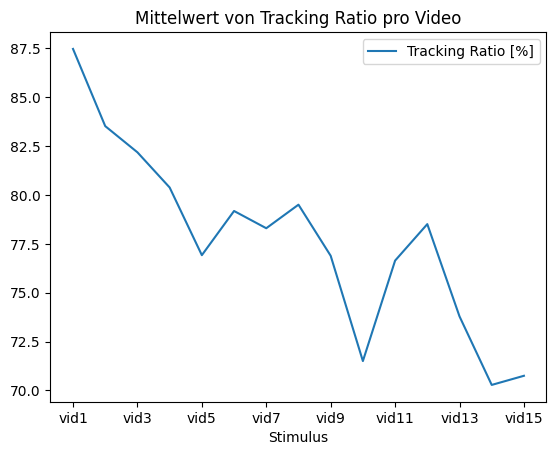

In [12]:
df_tracking_ratio_left_eye_all_participants
df_tracking_ratio_left_eye_all_participants.groupby("Stimulus").mean().reindex(["vid1","vid2","vid3","vid4","vid5","vid6"
,"vid7","vid8","vid9", "vid10","vid11","vid12","vid13","vid14","vid15"]).plot(title= "Mittelwert von Tracking Ratio pro Video")


df_tracking_ratio_left_eye_all_participants.groupby("Stimulus").mean().reindex(["vid1","vid2","vid3","vid4","vid5","vid6"
,"vid7","vid8","vid9", "vid10","vid11","vid12","vid13","vid14","vid15"])

,Tracking Ratio [%]
Stimulus,
vid1,88.340269
vid2,83.308697
vid3,82.185651
vid4,82.271009
vid5,78.056455
vid6,79.151788
vid7,78.424654
vid8,80.493883
vid9,75.663593


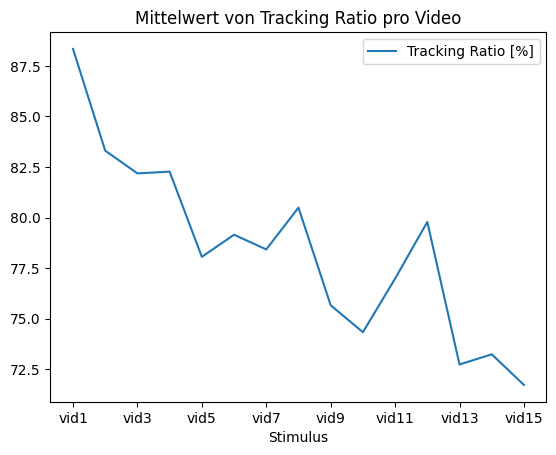

In [13]:
df_tracking_ratio_right_eye_all_participants
df_tracking_ratio_right_eye_all_participants.groupby("Stimulus").mean().reindex(["vid1","vid2","vid3","vid4","vid5","vid6"
,"vid7","vid8","vid9", "vid10","vid11","vid12","vid13","vid14","vid15"]).plot(title= "Mittelwert von Tracking Ratio pro Video")


df_tracking_ratio_right_eye_all_participants.groupby("Stimulus").mean().reindex(["vid1","vid2","vid3","vid4","vid5","vid6"
,"vid7","vid8","vid9", "vid10","vid11","vid12","vid13","vid14","vid15"])

In [ ]:
# 4. alle Personen pro Video: 15 kleine Plots, wird es zum Ende hin schlechter?
# alle Versuchspersonen in allgemeinen Plot

# 15 plots mit 95 VPs
os.chdir("C:/Users/Julia/Desktop/Daten-BA/SMI_Eventstatistics") 
#get all files in directory
list = os.listdir() 
# remove participants
list.remove("Event Statistics - Single - 82.txt")
df_tracking_ratio_left_eye_10_sek_threshold_all_participants = pd.DataFrame()
df_tracking_ratio_right_eye_10_sek_threshold_all_participants = pd.DataFrame()
for filename in list:
    print(filename)
    # input: filename # output: dataframe to work on
    df = dp.read_data(filename)
    df_use =dp.drop_unused_columns(df)
    
    # input: df_10_sec_of_videos # output: (df_left_eye, df_right_eye)
    df_left_eye =  dp.df_prepare_eye_tracking_data(df_use)[0] 
    df_right_eye = dp.df_prepare_eye_tracking_data(df_use)[1]
    
    # input: data_initial # output: necessary videomoments
    df_10_sec_of_videos_left = dp.cut_last_10sec_of_videos(df_left_eye) 
    df_10_sec_of_videos_right = dp.cut_last_10sec_of_videos(df_right_eye)
    
    df_tracking_ratio_one_participant = df_10_sec_of_videos_left.loc[:, ["Stimulus","Tracking Ratio [%]", "Participant"]]
    df_tracking_ratio_one_participant_right = df_10_sec_of_videos_right.loc[:, ["Stimulus","Tracking Ratio [%]", "Participant"]]

    
    df_tracking_ratio_left_eye_10_sek_threshold_all_participants = pd.concat([df_tracking_ratio_left_eye_10_sek_threshold_all_participants, df_tracking_ratio_one_participant])
    df_tracking_ratio_right_eye_10_sek_threshold_all_participants = pd.concat([df_tracking_ratio_right_eye_10_sek_threshold_all_participants, df_tracking_ratio_one_participant_right])

df_tracking_ratio_left_eye_10_sek_threshold_all_participants
df_tracking_ratio_right_eye_10_sek_threshold_all_participants

In [15]:
df_tracking_ratio_left_eye_10_sek_threshold_all_participants

,Stimulus,Tracking Ratio [%],Participant
13828,vid1,85.268,1
13830,vid1,85.268,1
13832,vid1,85.268,1
13833,vid1,85.268,1
13835,vid1,85.268,1
...,...,...,...
36297,vid15,80.356,97
36299,vid15,80.356,97
36301,vid15,80.356,97
36303,vid15,80.356,97


C:\Users\Julia\AppData\Local\Temp\ipykernel_26388\1570013139.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tracking_ratio_mean_by_participants = df_tracking_ratio_left_eye_10_sek_threshold_all_participants.groupby("Participant").mean() #96 Versuchspersonen


[Text(0.5, 0, 'Versuchsperson'), Text(0, 0.5, 'Tracking ratio [%]')]

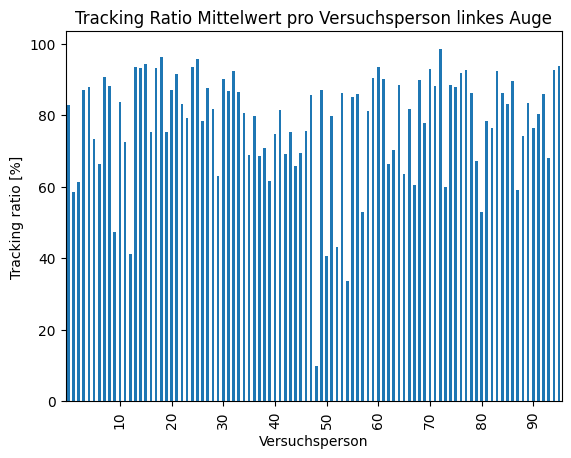

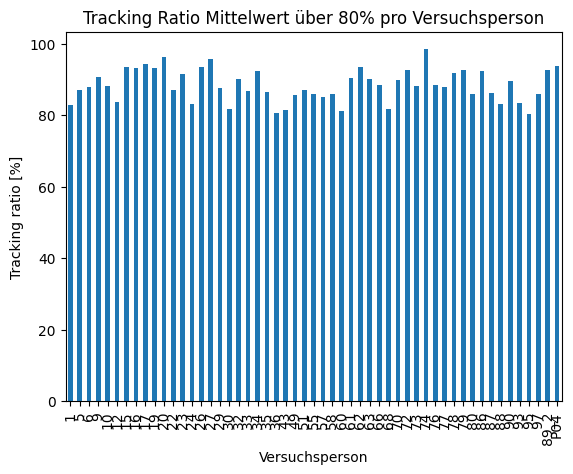

In [16]:
### Linkes Auge 

tracking_ratio_mean_by_participants = df_tracking_ratio_left_eye_10_sek_threshold_all_participants.groupby("Participant").mean() #96 Versuchspersonen
ax = tracking_ratio_mean_by_participants.plot(kind = "bar", title= "Tracking Ratio Mittelwert pro Versuchsperson linkes Auge", legend = False, xticks = [10,20,30,40,50,60,70,80,90])
ax.set(xlabel="Versuchsperson", ylabel="Tracking ratio [%]")

tracking_ratio_over_80 = tracking_ratio_mean_by_participants.loc[tracking_ratio_mean_by_participants["Tracking Ratio [%]"] >= 80.0, :]
len(tracking_ratio_over_80)
ax2 = tracking_ratio_over_80.plot(kind = "bar", title= "Tracking Ratio Mittelwert über 80% pro Versuchsperson", legend = False)#, #xticks = [10,20,30,40,50])
ax2.set(xlabel="Versuchsperson", ylabel="Tracking ratio [%]")
#tracking_ratio_over_80

55


C:\Users\Julia\AppData\Local\Temp\ipykernel_26388\1272602714.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tracking_ratio_mean_by_participants = df_tracking_ratio_right_eye_10_sek_threshold_all_participants.groupby("Participant").mean() #96 Versuchspersonen


[Text(0.5, 0, 'Versuchsperson'), Text(0, 0.5, 'Tracking ratio [%]')]

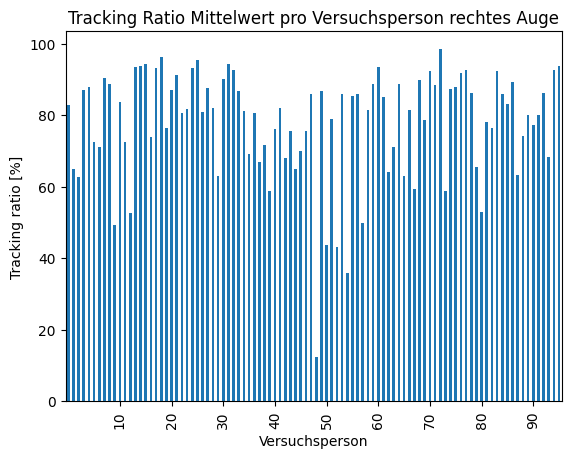

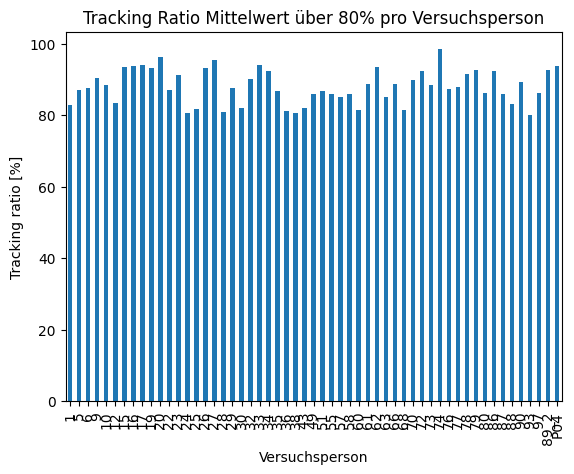

In [17]:
### Rechtes Auge

tracking_ratio_mean_by_participants = df_tracking_ratio_right_eye_10_sek_threshold_all_participants.groupby("Participant").mean() #96 Versuchspersonen
ax = tracking_ratio_mean_by_participants.plot(kind = "bar", title= "Tracking Ratio Mittelwert pro Versuchsperson rechtes Auge", legend = False, xticks = [10,20,30,40,50,60,70,80,90])
ax.set(xlabel="Versuchsperson", ylabel="Tracking ratio [%]")

tracking_ratio_over_80 = tracking_ratio_mean_by_participants.loc[tracking_ratio_mean_by_participants["Tracking Ratio [%]"] >= 80.0, :]
print(len(tracking_ratio_over_80))
ax2 = tracking_ratio_over_80.plot(kind = "bar", title= "Tracking Ratio Mittelwert über 80% pro Versuchsperson", legend = False)#, #xticks = [10,20,30,40,50])
ax2.set(xlabel="Versuchsperson", ylabel="Tracking ratio [%]")
#tracking_ratio_over_80

In [65]:
# 4. alle Personen pro Video: 15 kleine Plots, wird es zum Ende hin schlechter?
# alle Versuchspersonen in allgemeinen Plot
df_tracking_ratio_left_eye_10_sek_threshold_all_participants.groupby(["Participant", "Stimulus"]).mean().reset_index()
df_tracking_ratio_mean_participant_stimulus = df_tracking_ratio_left_eye_10_sek_threshold_all_participants.groupby(["Participant", "Stimulus"]).mean().reset_index()
df_tracking_ratio_mean_participant_stimulus.loc[df_tracking_ratio_mean_participant_stimulus["Participant"] == 1]

df_tracking_ratio_mean_participant_stimulus.loc[df_tracking_ratio_mean_participant_stimulus["Stimulus"] == "vid1", ["Participant", "Tracking Ratio [%]"]].reset_index()


,index,Participant,Tracking Ratio [%]
0,0,1,85.268
1,15,2,19.667
2,30,3,91.457
3,45,5,92.724
4,60,6,95.185
...,...,...,...
89,1335,94,93.826
90,1348,95,92.185
91,1363,97,86.931
92,1378,822,86.045


In [66]:
df_tracking_ratio_mean_participant_stimulus.loc[df_tracking_ratio_mean_participant_stimulus["Tracking Ratio [%]"] < 80.0]
#df_tracking_ratio_mean_participant_stimulus.loc[df_tracking_ratio_mean_participant_stimulus["Tracking Ratio [%]"] > 50.0]

,Participant,Stimulus,Tracking Ratio [%]
11,1,vid6,78.817
13,1,vid8,78.978
14,1,vid9,77.588
15,2,vid1,19.667
16,2,vid10,23.703
...,...,...,...
1388,822,vid5,69.589
1390,822,vid7,77.319
1391,822,vid8,65.140
1392,822,vid9,56.313


[Text(0.5, 0, 'Versuchsperson'), Text(0, 0.5, 'Tracking ratio [%]')]

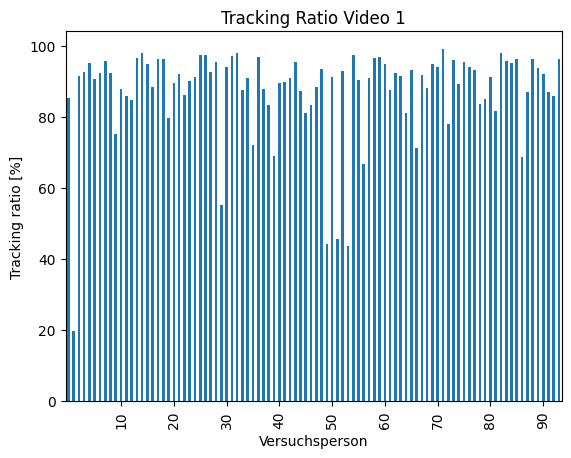

In [67]:
ax = df_tracking_ratio_mean_participant_stimulus.loc[df_tracking_ratio_mean_participant_stimulus["Stimulus"] == "vid1", ].plot(kind = "bar", title= "Tracking Ratio Video 1", legend = False, xticks = [10,20,30,40,50,60,70,80,90])
ax.set(xlabel="Versuchsperson", ylabel="Tracking ratio [%]")

[Text(0.5, 0, 'Versuchsperson'), Text(0, 0.5, 'Tracking ratio [%]')]

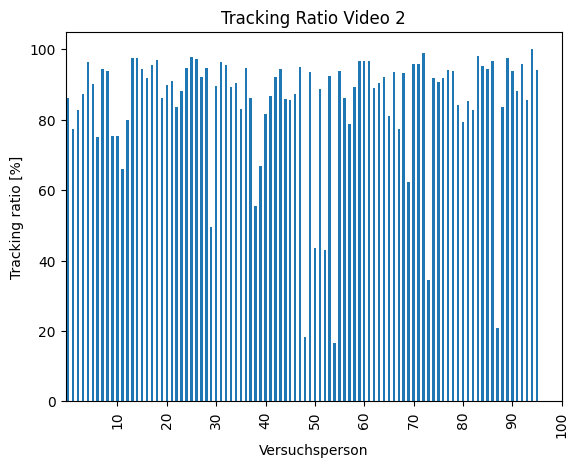

In [38]:
ax = df_tracking_ratio_mean_participant_stimulus.loc[df_tracking_ratio_mean_participant_stimulus["Stimulus"] == "vid2", ].plot(kind = "bar", title= "Tracking Ratio Video 2", legend = False, 
xticks = [10, 20,30, 40, 50, 60, 70, 80, 90, 100])#, 822, '89_2', 'P04'])
ax.set(xlabel="Versuchsperson", ylabel="Tracking ratio [%]")

[Text(0.5, 0, 'Versuchsperson'), Text(0, 0.5, 'Tracking ratio [%]')]

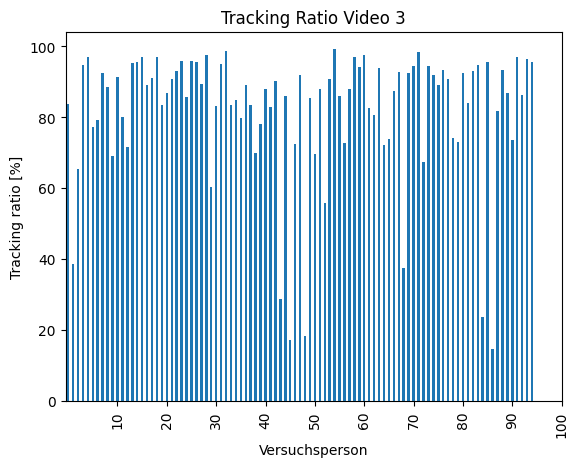

In [64]:
vid_number = 3
ax = df_tracking_ratio_mean_participant_stimulus.loc[df_tracking_ratio_mean_participant_stimulus["Stimulus"] == "vid" + str(vid_number), ].plot(kind = "bar", title= "Tracking Ratio Video " + str(vid_number), legend = False, 
xticks = [10, 20,30, 40, 50, 60, 70, 80, 90, 100])#, 822, '89_2', 'P04'])
ax.set(xlabel="Versuchsperson", ylabel="Tracking ratio [%]")

[Text(0.5, 0, 'Versuchsperson'), Text(0, 0.5, 'Tracking ratio [%]')]

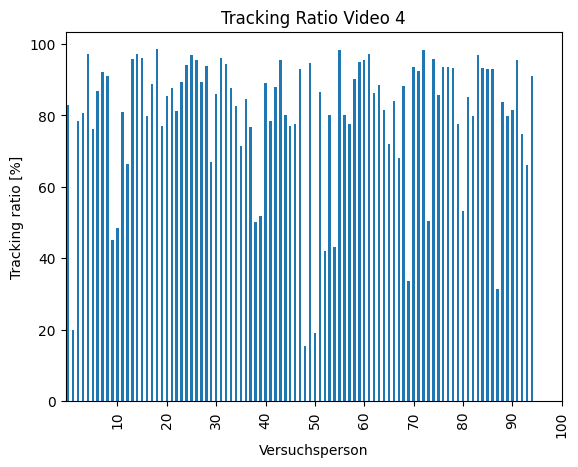

In [41]:
vid_number = 4
ax = df_tracking_ratio_mean_participant_stimulus.loc[df_tracking_ratio_mean_participant_stimulus["Stimulus"] == "vid" + str(vid_number), ].plot(kind = "bar", title= "Tracking Ratio Video " + str(vid_number), legend = False, 
xticks = [10, 20,30, 40, 50, 60, 70, 80, 90, 100])#, 822, '89_2', 'P04'])
ax.set(xlabel="Versuchsperson", ylabel="Tracking ratio [%]")

[Text(0.5, 0, 'Versuchsperson'), Text(0, 0.5, 'Tracking ratio [%]')]

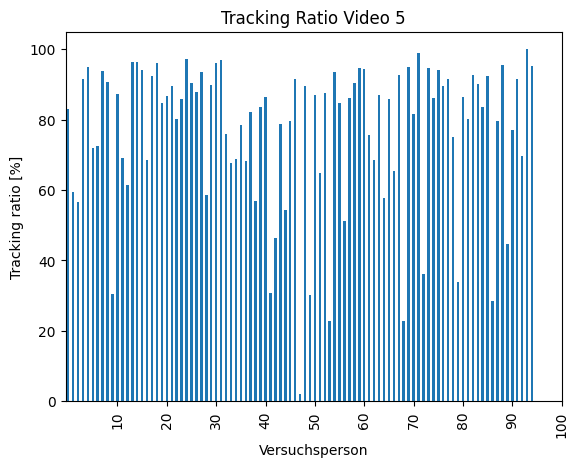

In [42]:
vid_number = 5
ax = df_tracking_ratio_mean_participant_stimulus.loc[df_tracking_ratio_mean_participant_stimulus["Stimulus"] == "vid" + str(vid_number), ].plot(kind = "bar", title= "Tracking Ratio Video " + str(vid_number), legend = False, 
xticks = [10, 20,30, 40, 50, 60, 70, 80, 90, 100])#, 822, '89_2', 'P04'])
ax.set(xlabel="Versuchsperson", ylabel="Tracking ratio [%]")

[Text(0.5, 0, 'Versuchsperson'), Text(0, 0.5, 'Tracking ratio [%]')]

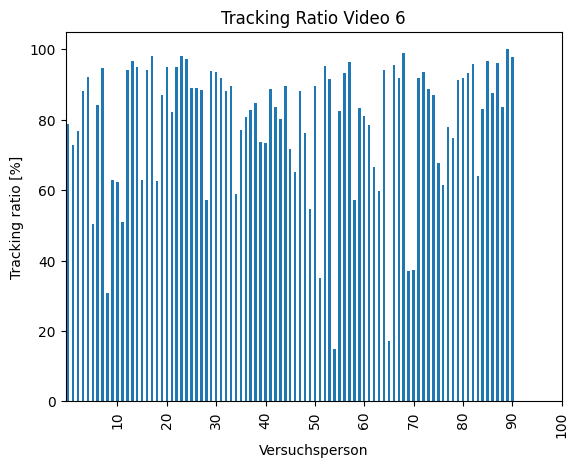

In [54]:
vid_number = 6
ax = df_tracking_ratio_mean_participant_stimulus.loc[df_tracking_ratio_mean_participant_stimulus["Stimulus"] == "vid" + str(vid_number), ].plot(kind = "bar", title= "Tracking Ratio Video " + str(vid_number), legend = False, 
xticks = [10, 20,30, 40, 50, 60, 70, 80, 90, 100])#, 822, '89_2', 'P04'])
ax.set(xlabel="Versuchsperson", ylabel="Tracking ratio [%]")

[Text(0.5, 0, 'Versuchsperson'), Text(0, 0.5, 'Tracking ratio [%]')]

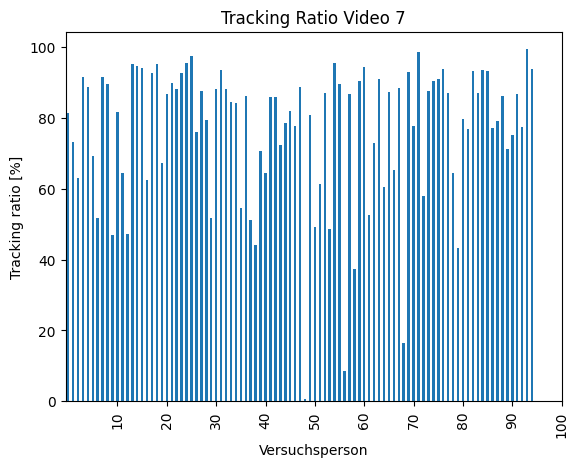

In [55]:
vid_number = 7
ax = df_tracking_ratio_mean_participant_stimulus.loc[df_tracking_ratio_mean_participant_stimulus["Stimulus"] == "vid" + str(vid_number), ].plot(kind = "bar", title= "Tracking Ratio Video " + str(vid_number), legend = False, 
xticks = [10, 20,30, 40, 50, 60, 70, 80, 90, 100])#, 822, '89_2', 'P04'])
ax.set(xlabel="Versuchsperson", ylabel="Tracking ratio [%]")

[Text(0.5, 0, 'Versuchsperson'), Text(0, 0.5, 'Tracking ratio [%]')]

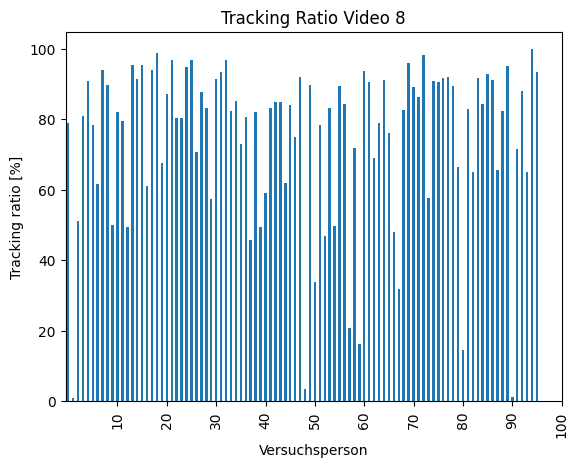

In [56]:
vid_number = 8
ax = df_tracking_ratio_mean_participant_stimulus.loc[df_tracking_ratio_mean_participant_stimulus["Stimulus"] == "vid" + str(vid_number), ].plot(kind = "bar", title= "Tracking Ratio Video " + str(vid_number), legend = False, 
xticks = [10, 20,30, 40, 50, 60, 70, 80, 90, 100])#, 822, '89_2', 'P04'])
ax.set(xlabel="Versuchsperson", ylabel="Tracking ratio [%]")

[Text(0.5, 0, 'Versuchsperson'), Text(0, 0.5, 'Tracking ratio [%]')]

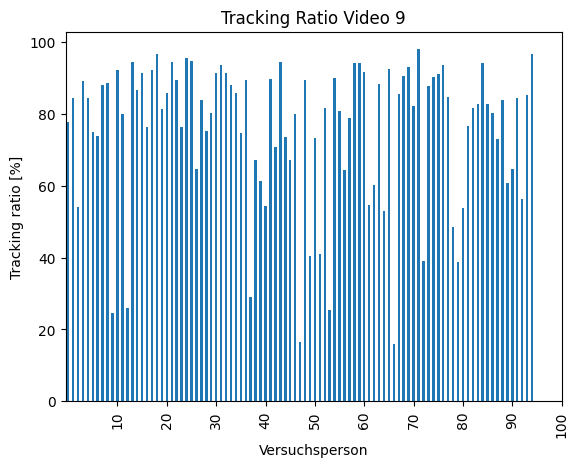

In [57]:
vid_number = 9
ax = df_tracking_ratio_mean_participant_stimulus.loc[df_tracking_ratio_mean_participant_stimulus["Stimulus"] == "vid" + str(vid_number), ].plot(kind = "bar", title= "Tracking Ratio Video " + str(vid_number), legend = False, 
xticks = [10, 20,30, 40, 50, 60, 70, 80, 90, 100])
ax.set(xlabel="Versuchsperson", ylabel="Tracking ratio [%]")

[Text(0.5, 0, 'Versuchsperson'), Text(0, 0.5, 'Tracking ratio [%]')]

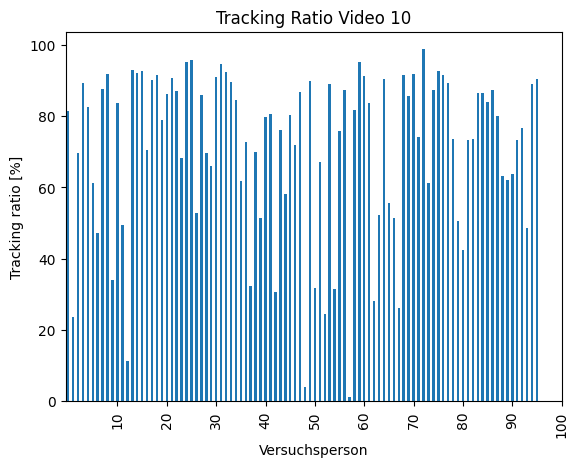

In [58]:
vid_number = 10
ax = df_tracking_ratio_mean_participant_stimulus.loc[df_tracking_ratio_mean_participant_stimulus["Stimulus"] == "vid" + str(vid_number), ].plot(kind = "bar", title= "Tracking Ratio Video " + str(vid_number), legend = False, 
xticks = [10, 20,30, 40, 50, 60, 70, 80, 90, 100])#, 822, '89_2', 'P04'])
ax.set(xlabel="Versuchsperson", ylabel="Tracking ratio [%]")

[Text(0.5, 0, 'Versuchsperson'), Text(0, 0.5, 'Tracking ratio [%]')]

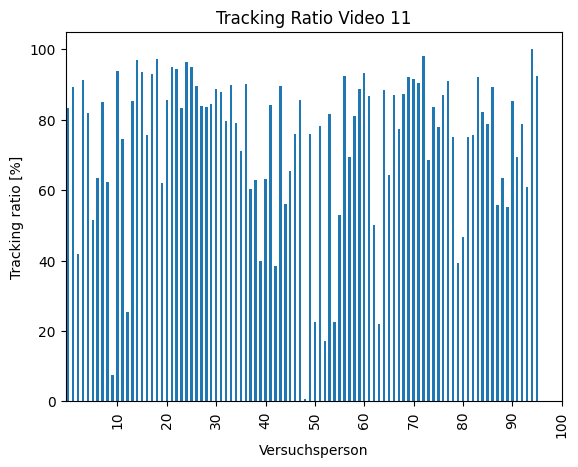

In [59]:
vid_number = 11
ax = df_tracking_ratio_mean_participant_stimulus.loc[df_tracking_ratio_mean_participant_stimulus["Stimulus"] == "vid" + str(vid_number), ].plot(kind = "bar", title= "Tracking Ratio Video " + str(vid_number), legend = False, 
xticks = [10, 20,30, 40, 50, 60, 70, 80, 90, 100])#, 822, '89_2', 'P04'])
ax.set(xlabel="Versuchsperson", ylabel="Tracking ratio [%]")

[Text(0.5, 0, 'Versuchsperson'), Text(0, 0.5, 'Tracking ratio [%]')]

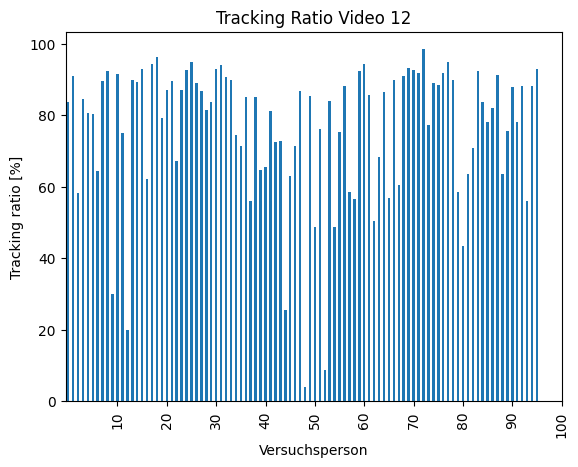

In [60]:
vid_number = 12
ax = df_tracking_ratio_mean_participant_stimulus.loc[df_tracking_ratio_mean_participant_stimulus["Stimulus"] == "vid" + str(vid_number), ].plot(kind = "bar", title= "Tracking Ratio Video " + str(vid_number), legend = False, 
xticks = [10, 20,30, 40, 50, 60, 70, 80, 90, 100])#, 822, '89_2', 'P04'])
ax.set(xlabel="Versuchsperson", ylabel="Tracking ratio [%]")

[Text(0.5, 0, 'Versuchsperson'), Text(0, 0.5, 'Tracking ratio [%]')]

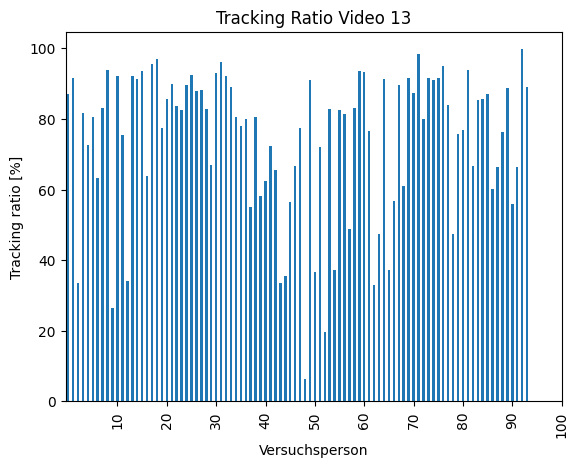

In [61]:
vid_number = 13
ax = df_tracking_ratio_mean_participant_stimulus.loc[df_tracking_ratio_mean_participant_stimulus["Stimulus"] == "vid" + str(vid_number), ].plot(kind = "bar", title= "Tracking Ratio Video " + str(vid_number), legend = False, 
xticks = [10, 20,30, 40, 50, 60, 70, 80, 90, 100])#, 822, '89_2', 'P04'])
ax.set(xlabel="Versuchsperson", ylabel="Tracking ratio [%]")

[Text(0.5, 0, 'Versuchsperson'), Text(0, 0.5, 'Tracking ratio [%]')]

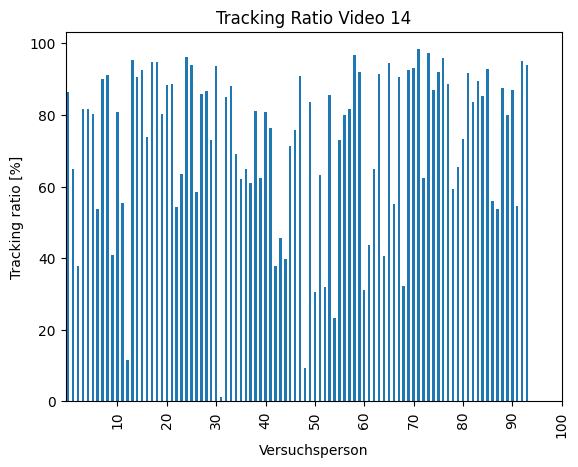

In [62]:
vid_number = 14
ax = df_tracking_ratio_mean_participant_stimulus.loc[df_tracking_ratio_mean_participant_stimulus["Stimulus"] == "vid" + str(vid_number), ].plot(kind = "bar", title= "Tracking Ratio Video " + str(vid_number), legend = False, 
xticks = [10, 20,30, 40, 50, 60, 70, 80, 90, 100])#, 822, '89_2', 'P04'])
ax.set(xlabel="Versuchsperson", ylabel="Tracking ratio [%]")

[Text(0.5, 0, 'Versuchsperson'), Text(0, 0.5, 'Tracking ratio [%]')]

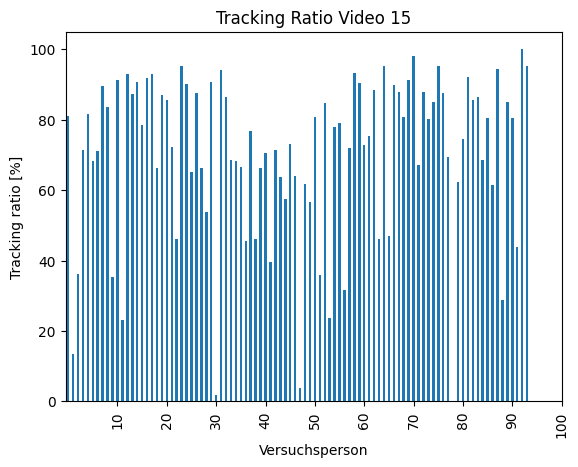

In [63]:
vid_number = 15
ax = df_tracking_ratio_mean_participant_stimulus.loc[df_tracking_ratio_mean_participant_stimulus["Stimulus"] == "vid" + str(vid_number), ].plot(kind = "bar", title= "Tracking Ratio Video " + str(vid_number), legend = False, 
xticks = [10, 20,30, 40, 50, 60, 70, 80, 90, 100])#, 822, '89_2', 'P04'])
ax.set(xlabel="Versuchsperson", ylabel="Tracking ratio [%]")

In [ ]:
df_tracking_ratio_mean_participant_stimulus.loc[df_tracking_ratio_mean_participant_stimulus["Stimulus"] == "vid1", ["Tracking Ratio [%]", "Participant"]].reset_index()

In [ ]:
plt.figure(1, figsize=(100,4))
for video in range(1,16):
    plt.subplot(1,16,video)
    participant = df_tracking_ratio_mean_participant_stimulus["Participant"].unique()
    data = df_tracking_ratio_mean_participant_stimulus.loc[df_tracking_ratio_mean_participant_stimulus["Stimulus"] == "vid1", "Tracking Ratio [%]"].values

    plt.bar(x = participant, height = data)
    plt.title("Blink Number of Participant 1 and Video " + str(video))
plt.show()

In [ ]:
plt.subplot(1,16,video)
participant = df_tracking_ratio_mean_participant_stimulus["Participant"].unique()
data = df_tracking_ratio_mean_participant_stimulus.loc[df_tracking_ratio_mean_participant_stimulus["Stimulus"] == "vid1", ["Tracking Ratio [%]", "Participant"]]
plt.bar(x = participant, height = data)
plt.title("Blink Number of Participant 1 and Video " + str(video))

In [ ]:
df_tracking_ratio_left_eye_10_sek_threshold_all_participants.groupby(["Participant", "Stimulus"]).mean().reset_index()

,Participant,Stimulus,Tracking Ratio [%]
0,1,vid1,85.268
1,1,vid10,81.388
2,1,vid11,83.450
3,1,vid12,83.736
4,1,vid13,87.020
...,...,...,...
1417,P04,vid5,95.083
1418,P04,vid6,97.945
1419,P04,vid7,93.836
1420,P04,vid8,93.398


In [2]:
print(list(range(50,100)))

[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [ ]:
[50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
...
 95,
 96,
 97,
 98,
 99]